# Study parameters & Analysis results

In [1]:
# we create a dictionary that sums up all the quantities computed in the study
# initialized by the study parameters
study = {'Nobs':5, # number of observation (parameter of the study/analysis)
         'Nsample':100, # number of samples per observation (parameter of the study/analysis)
         'study_duration':'2 months'} 

In [2]:
# generate random data to analyze
import numpy as np
np.random.seed(10)

Y = [np.exp(np.random.randn(study['Nsample'])) for i in range(study['Nobs'])]

# mean and s.e.m
study['mean_value'] = np.round(np.mean(Y),3)
study['sem_value'] = np.round(np.std(np.mean(Y, axis=1)),3)

In [3]:
# statistical test, corelation across observations

from itertools import product
from scipy.stats import pearsonr

ccs, pvals = [], []
for i, y1 in enumerate(Y):
    for j, y2 in enumerate(Y[i+1:]):
        res = pearsonr(y1, y2)
        ccs.append(res[0])
        pvals.append(res[1])

study['cc_coef_over_obs_min'], study['cc_coef_over_obs_max'] = np.round(np.min(ccs),3), np.round(np.max(ccs),3)
study['cc_coef_over_obs_mean'] = np.round(np.mean(ccs),3)
study['cc_coef_over_obs_std'] = np.round(np.std(ccs),3)

study['cc_pval_over_obs_min'],study['cc_pval_over_obs_max'] = np.round(np.min(pvals),3), np.round(np.max(pvals),3)


In [4]:
import pprint
pprint.pprint(study)

{'Nobs': 5,
 'Nsample': 100,
 'cc_coef_over_obs_max': 0.223,
 'cc_coef_over_obs_mean': 0.055,
 'cc_coef_over_obs_min': -0.122,
 'cc_coef_over_obs_std': 0.103,
 'cc_pval_over_obs_max': 0.856,
 'cc_pval_over_obs_min': 0.026,
 'mean_value': 1.605,
 'sem_value': 0.13,
 'study_duration': '2 months'}


## Saving the study quantities

In [6]:
np.save('../study.npy', study) # we save it in the parent directory


> we have saved this dictionary and it can now be used as a `study_file` to generate manuscripts

> for example (in the parent directory), run: `finalyz templates/paper.txt --study_file study.npz` 

# Making figures

The whole process relies on the *datavyz* module, check:
https://github.com/yzerlaut/datavyz

In [6]:
# import graph_env
from datavyz import graph_env_manuscript as ge
from IPython.display import Image

### Figure 1 -- single column

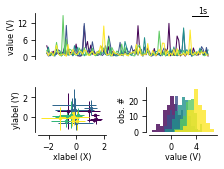

In [7]:
fig, AX = ge.figure(axes_extents=[[[2,1]],
                                 [[1,1],[1,1]]],
                   figsize=(1.05,1.))
ge.plot(Y=Y,
        ax=AX[0][0],
        axes_args=dict(spines=['left'],ylabel='value (V)'))
ge.draw_bar_scales(AX[0][0], Xbar=10, Xbar_label='1s', loc='top-right')
ge.scatter(X=np.random.randn(4,5), sX=np.random.randn(4,5),
           Y=np.random.randn(4,5), sY=np.random.randn(4,5),
           ax=AX[1][0],
           axes_args={'xlabel':'xlabel (X)', 'ylabel':'ylabel (Y)'})
for i in range(5):
    AX[1][1].hist(np.random.randn(100)+i, color=ge.viridis(i/4), alpha=.8)
ge.set_plot(AX[1][1], xlabel='value (V)', ylabel='obs. #')

In [8]:
ge.multipanel_figure([[fig]],
                     LABELS=[['a'],['b','c']], X_LABELS=[[10],[10,130]], Y_LABELS=[[0],[80,80]],
                     width='single-column', height=60.,
                     grid=True, bg='gray',
                     fig_name='fig1.png')

RUNNING: inkscape fig1.svg --export-area-page --export-background="gray" --export-png="fig1.png" --export-dpi=300
[ok] figure successfully exported as: fig1.png


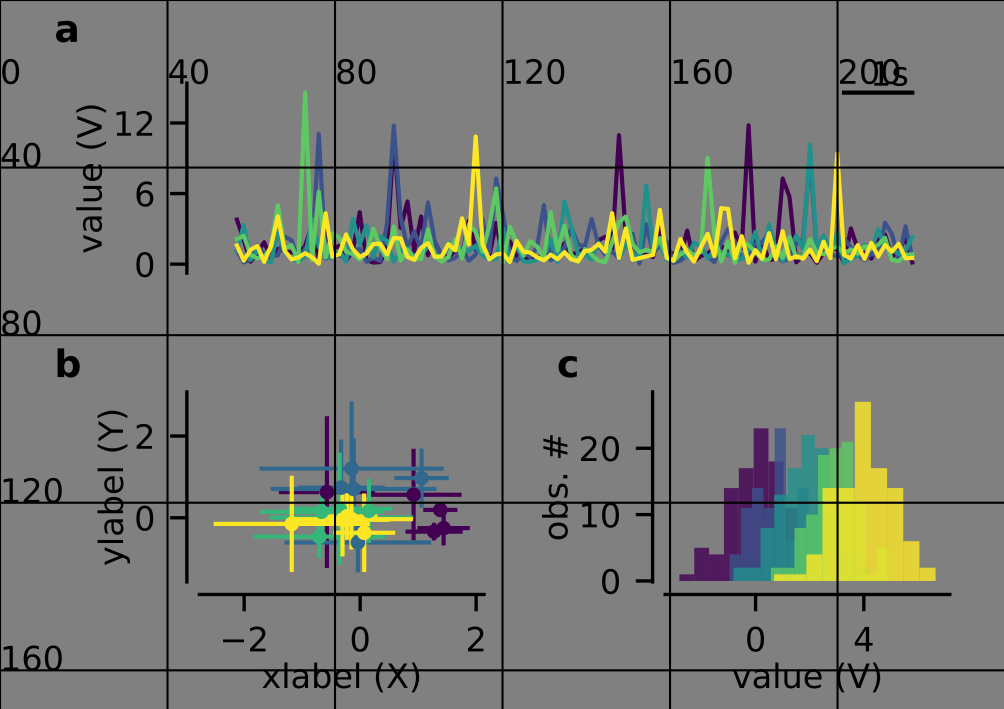

In [9]:
Image("fig1.png", retina=True)

Once you're done with the adjustment, remove the grid and the grey background

In [11]:
ge.multipanel_figure([[fig]],
                     LABELS=[['a'],['b','c']], X_LABELS=[[10],[10,130]], Y_LABELS=[[0],[80,80]],
                     width='single-column', height=60.,
                     fig_name='fig1.png')

RUNNING: inkscape fig1.svg --export-area-page --export-background="white" --export-png="fig1.png" --export-dpi=300
[ok] figure successfully exported as: fig1.png


### Figure 2 -- double column

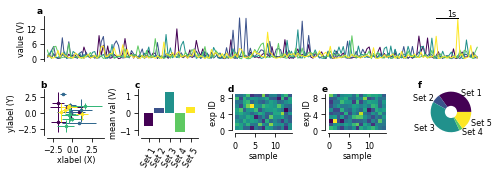

In [12]:
fig, AX = ge.figure(axes_extents=[[[5,1]],
                                 [[1,1],[1,1],[1,1],[1,1],[1,1]]], figsize=(.95,1.), right=2.)

np.random.seed(4)

ge.plot(Y=[np.exp(np.random.randn(200)) for i in range(5)],
        ax=AX[0][0],
        axes_args=dict(spines=['left'],ylabel='value (V)',xlim=[0,200]))

ge.draw_bar_scales(AX[0][0], Xbar=10, Xbar_label='1s', loc='top-right')
ge.scatter(X=np.random.randn(4,5), sX=np.random.randn(4,5),
           Y=np.random.randn(4,5), sY=np.random.randn(4,5),
           ax=AX[1][0],
           axes_args={'xlabel':'xlabel (X)', 'ylabel':'ylabel (Y)'})

ge.bar(1.5*np.random.randn(5), COLORS=[ge.viridis(i/4) for i in range(5)],
       ax=AX[1][1], axes_args=dict(ylabel='mean val (V)', xticks=np.arange(5), xticks_rotation=60,
                                   xticks_labels=['Set %i' % (i+1) for i in range(5)]))

ge.pie(np.random.uniform(0,1,5), ax=AX[1][4], COLORS=[ge.viridis(i/4) for i in range(5)],
       ext_labels=['Set %i' % (i+1) for i in range(5)])

ge.matrix(np.random.randn(15,10), ax=AX[1][2])
ge.matrix(np.random.randn(15,10), ax=AX[1][3])
for ax in [AX[1][2], AX[1][3]]:
    ge.set_plot(ax, xlabel='sample', ylabel='exp ID')                                                        
                                                             
for i, ax in enumerate(ge.flat(AX)):
    ge.panel_label(ax, ge.int_to_letter(i))
    
ge.savefig(fig, './fig2.png')

RUNNING: inkscape fig2.svg --export-area-page --export-background="gray" --export-png="fig2.png" --export-dpi=300
[ok] figure successfully exported as: fig2.png


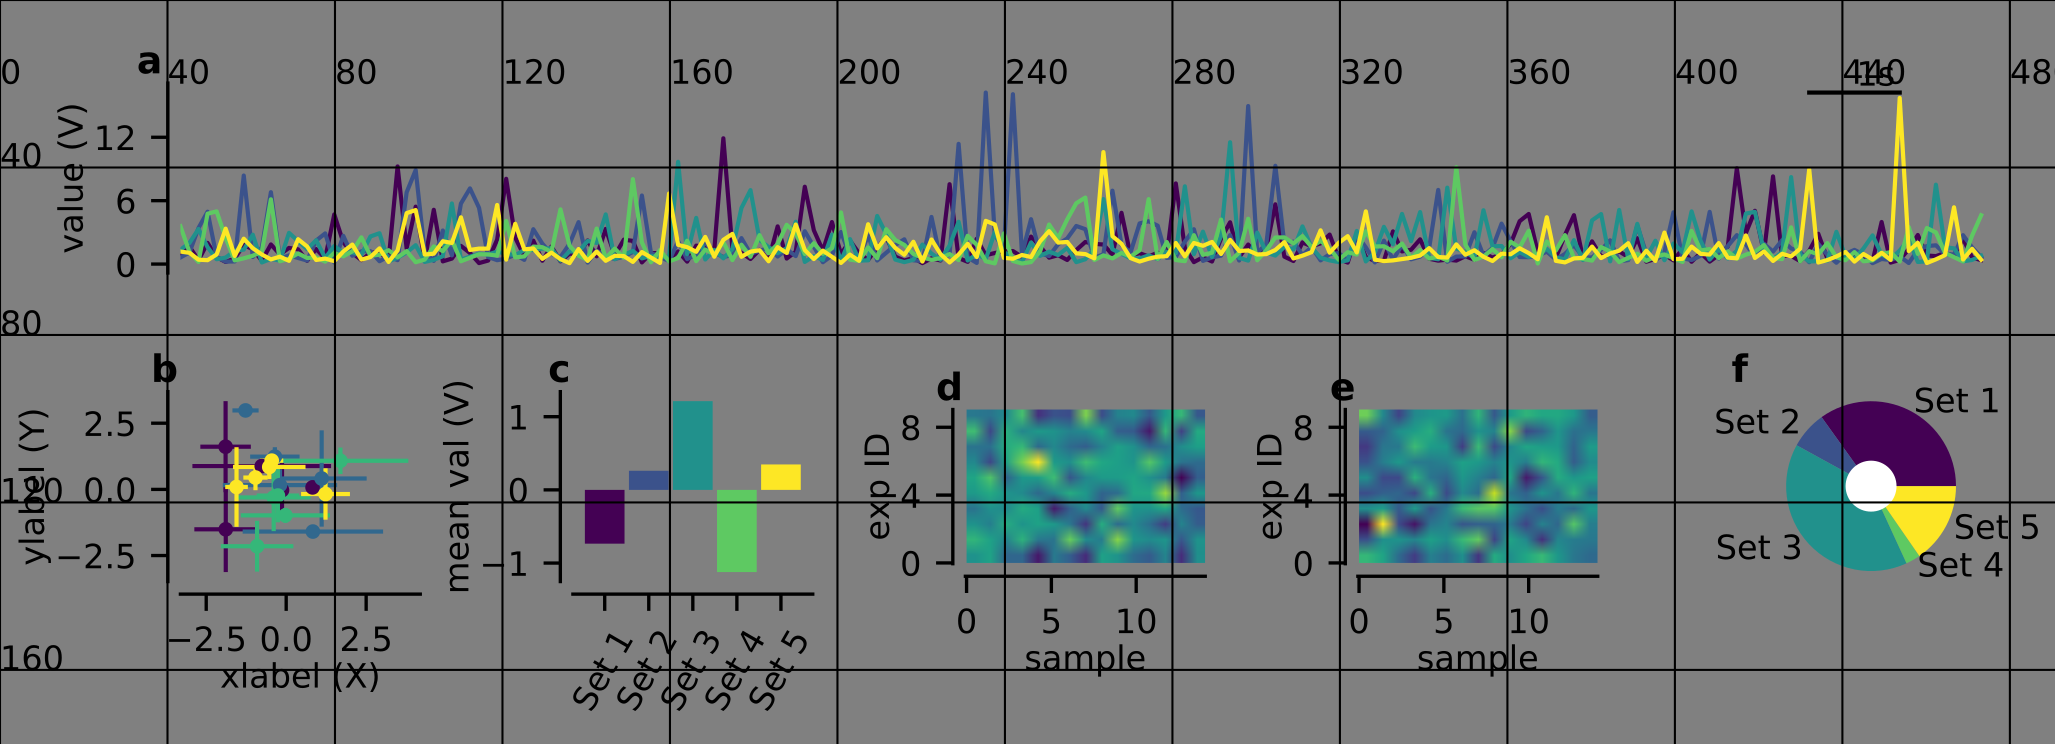

In [13]:
ge.multipanel_figure(fig,
                     width='double-column', height=63.,
                     grid=True, bg='gray',
                     fig_name='fig2.png')
Image("fig2.png", retina=True)

RUNNING: inkscape fig2.svg --export-area-page --export-background="white" --export-png="fig2.png" --export-dpi=300
[ok] figure successfully exported as: fig2.png


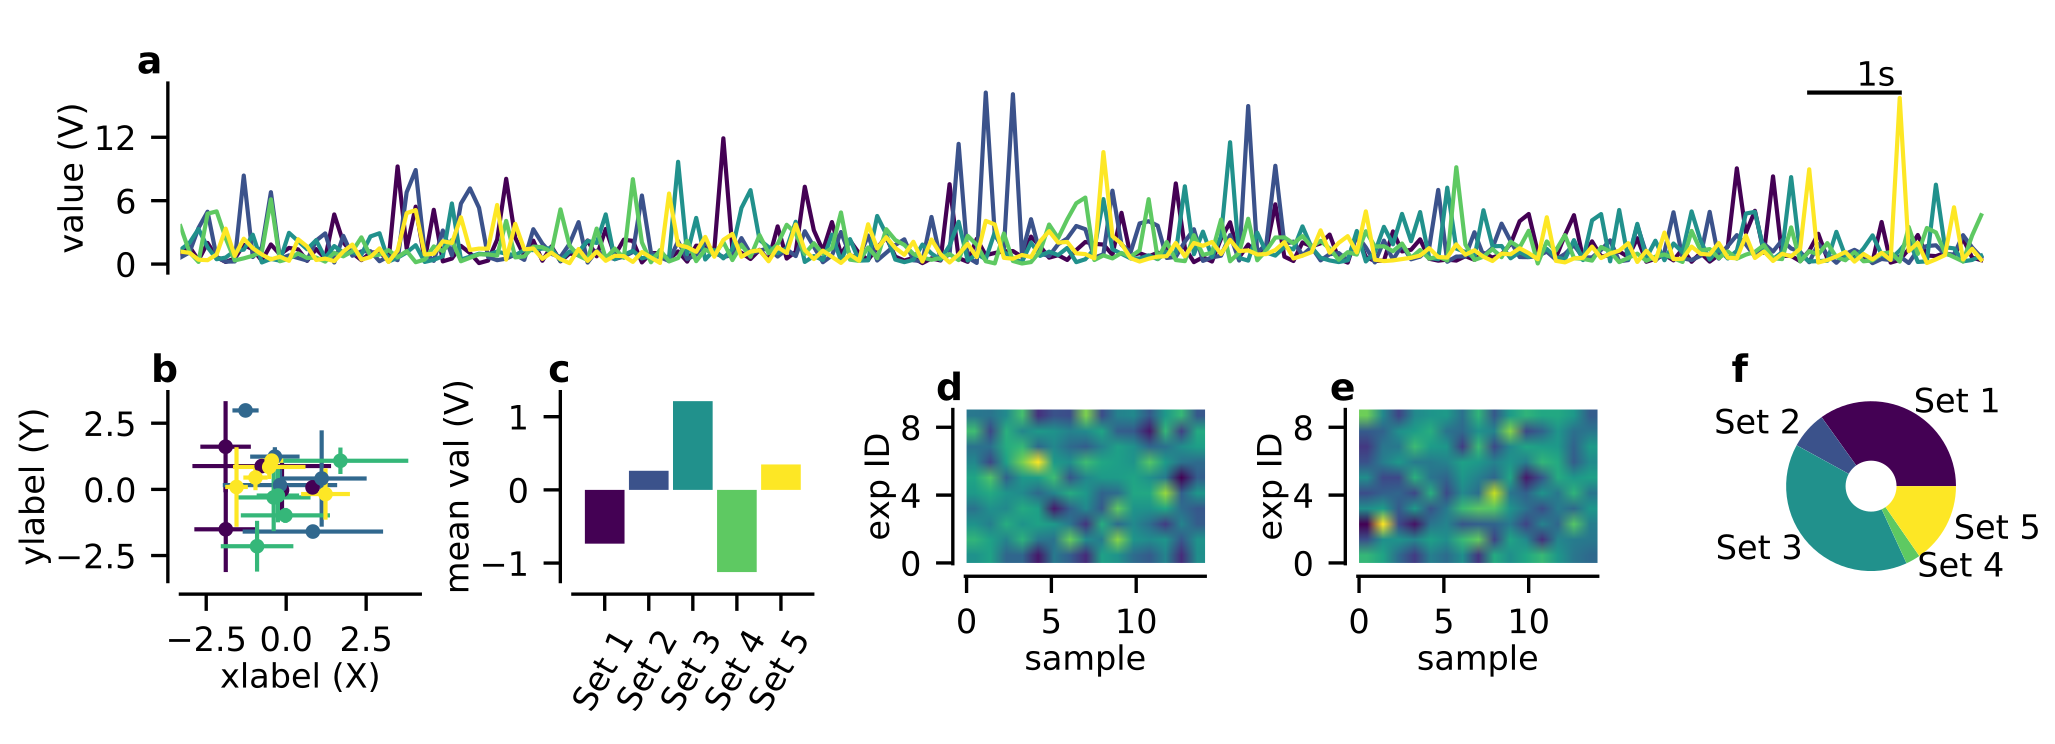

In [14]:
ge.multipanel_figure(fig,
                     width='double-column', height=63.,
                     fig_name='fig2.png')
Image("fig2.png", retina=True)

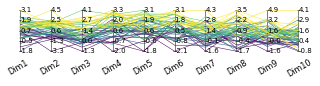

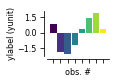

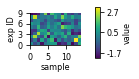

In [33]:
fig1, ax = ge.parallel_plot(Y=np.concatenate([np.random.randn(10,10)+i*.5 for i in range(5)]),
                            COLORS=[ge.viridis(int(i/10)/4) for i in range(50)],
                            label_annotation_args=dict(va='top', ha='center',rotation=30.),
                            fig_args=dict(figsize=(1.35,1.), left=0.3))

fig2, _ = ge.bar(np.random.randn(8),
       COLORS=[ge.viridis(i/7) for i in range(8)],
        ylabel='ylabel (yunit)', xlabel='obs. #')

fig3, ax, acb = ge.matrix(np.random.randn(15,10), 
                          xlabel='sample', ylabel='exp ID',
                          bar_legend_args={'label':'value'})

for i, ax in enumerate(ge.flat(AX)):
    ge.panel_label(ax, ge.int_to_letter(i))

RUNNING: inkscape fig3.svg --export-area-page --export-background="gray" --export-png="fig3.png" --export-dpi=300
[ok] figure successfully exported as: fig3.png


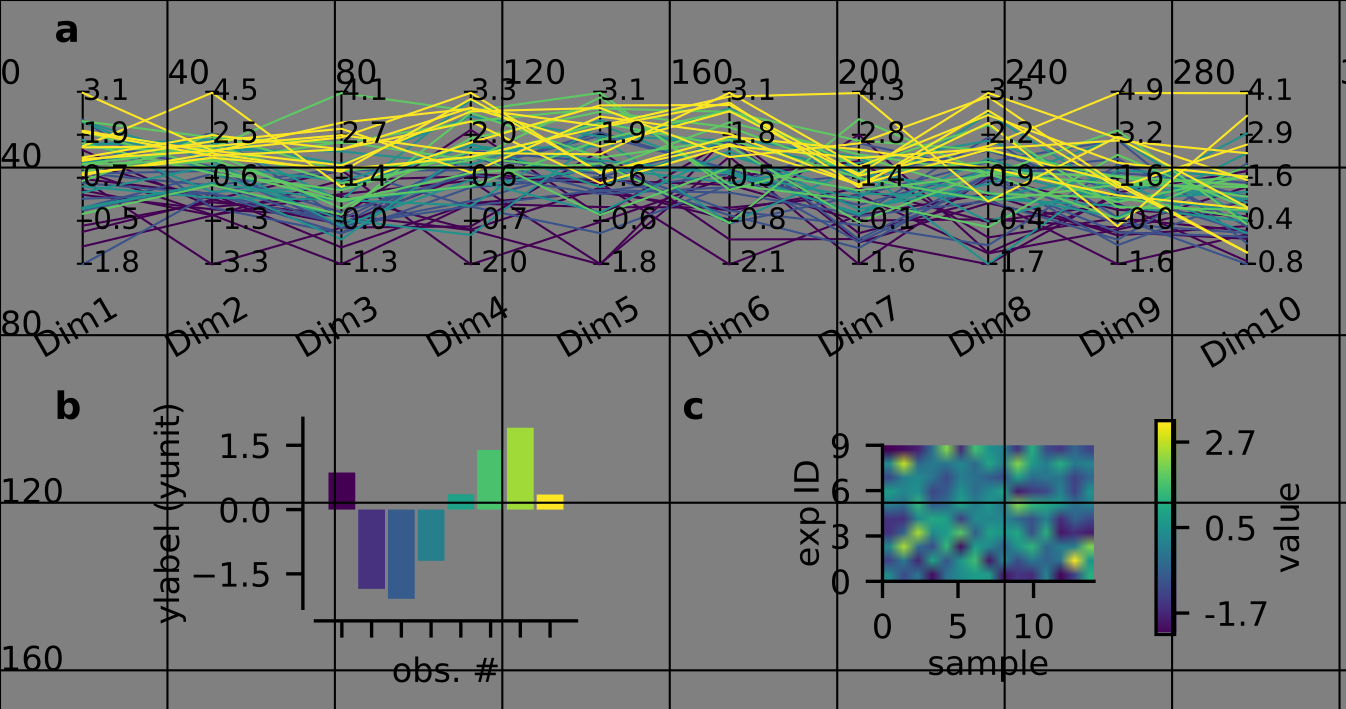

In [35]:
ge.multipanel_figure([[fig1],[fig2,fig3]],
                     X=[[0],[30,170]], Y=[[0],[80,80]],
                     LABELS=[['a'],['b','c']], X_LABELS=[[10],[10,160]], Y_LABELS=[[0],[90,90]],
                     width='one-and-a-half-column', height=60.,
                     grid=True, bg='gray',
                     fig_name='fig3.png')
Image("fig3.png", retina=True)

RUNNING: inkscape fig3.svg --export-area-page --export-background="white" --export-png="fig3.png" --export-dpi=300
[ok] figure successfully exported as: fig3.png


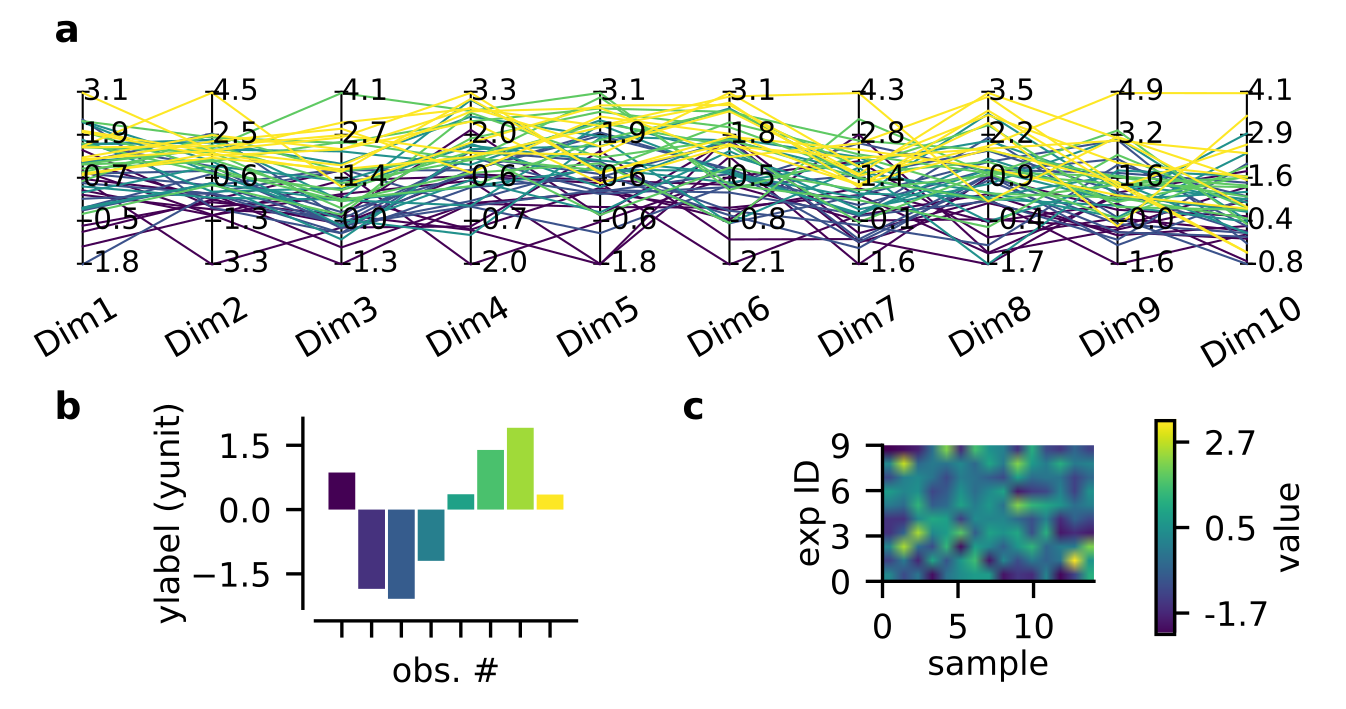

In [36]:
ge.multipanel_figure([[fig1],[fig2,fig3]],
                     X=[[0],[30,170]], Y=[[0],[80,80]],
                     LABELS=[['a'],['b','c']], X_LABELS=[[10],[10,160]], Y_LABELS=[[0],[90,90]],
                     width='one-and-a-half-column', height=60.,
                     fig_name='fig3.png')
Image("fig3.png", retina=True)